#Data Exploration

In [148]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [149]:
titanic = pd.read_csv('/content/Titanic_test.csv')
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [150]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [151]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [152]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [153]:
titanic.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [154]:
print('The percentage of missing values in titanic', titanic.isnull().sum()/len(titanic)*100)

The percentage of missing values in titanic PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


#Dropping the column

##PassengerId: This is just a unique identifier and does not provide meaningful information for analysis.

##Cabin: This column has 78% missing values and might not add much value unless you plan to impute the missing values or are specifically interested in cabin locations.

##Name: While interesting, the name does not usually contribute to most analyses unless you are looking into specific demographics or family groupings.

##Ticket: The ticket number is generally not useful for most analyses.

In [155]:
titanic.drop(['PassengerId', 'Cabin','Ticket','Name'], axis=1, inplace=True)

In [156]:
titanic

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


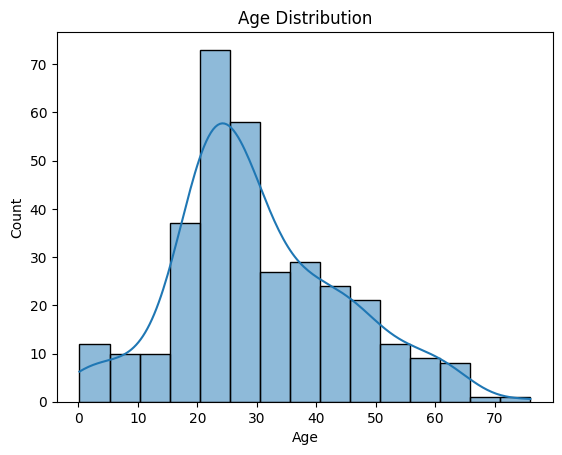

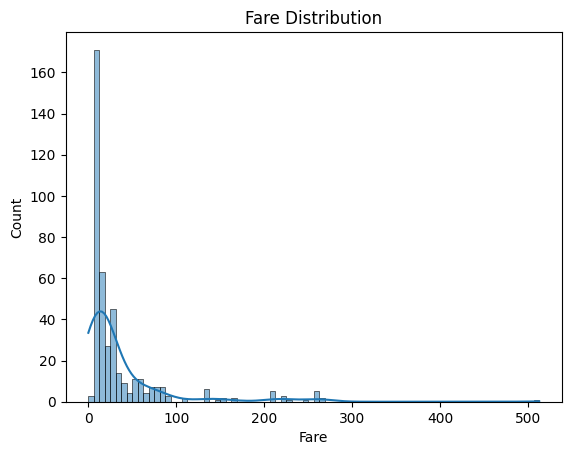

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
sns.histplot(titanic['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

# Fare distribution
sns.histplot(titanic['Fare'].dropna(), kde=True)
plt.title('Fare Distribution')
plt.show()


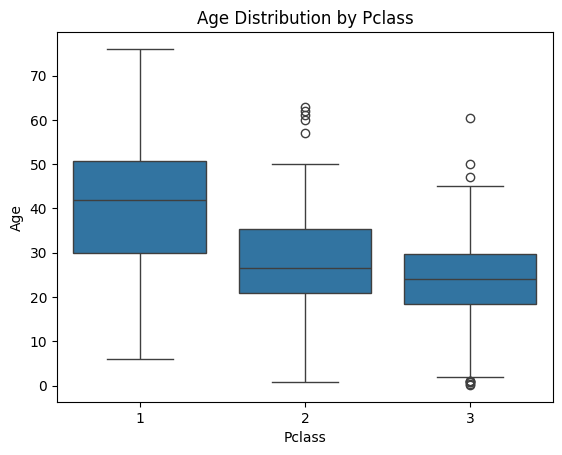

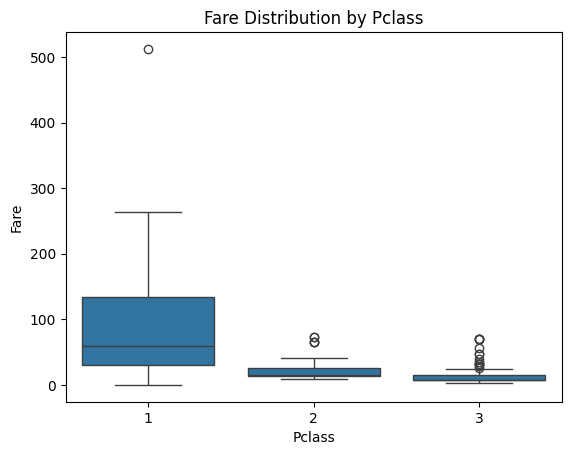

In [158]:
# Age by Pclass
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.title('Age Distribution by Pclass')
plt.show()

# Fare by Pclass
sns.boxplot(x='Pclass', y='Fare', data=titanic)
plt.title('Fare Distribution by Pclass')
plt.show()


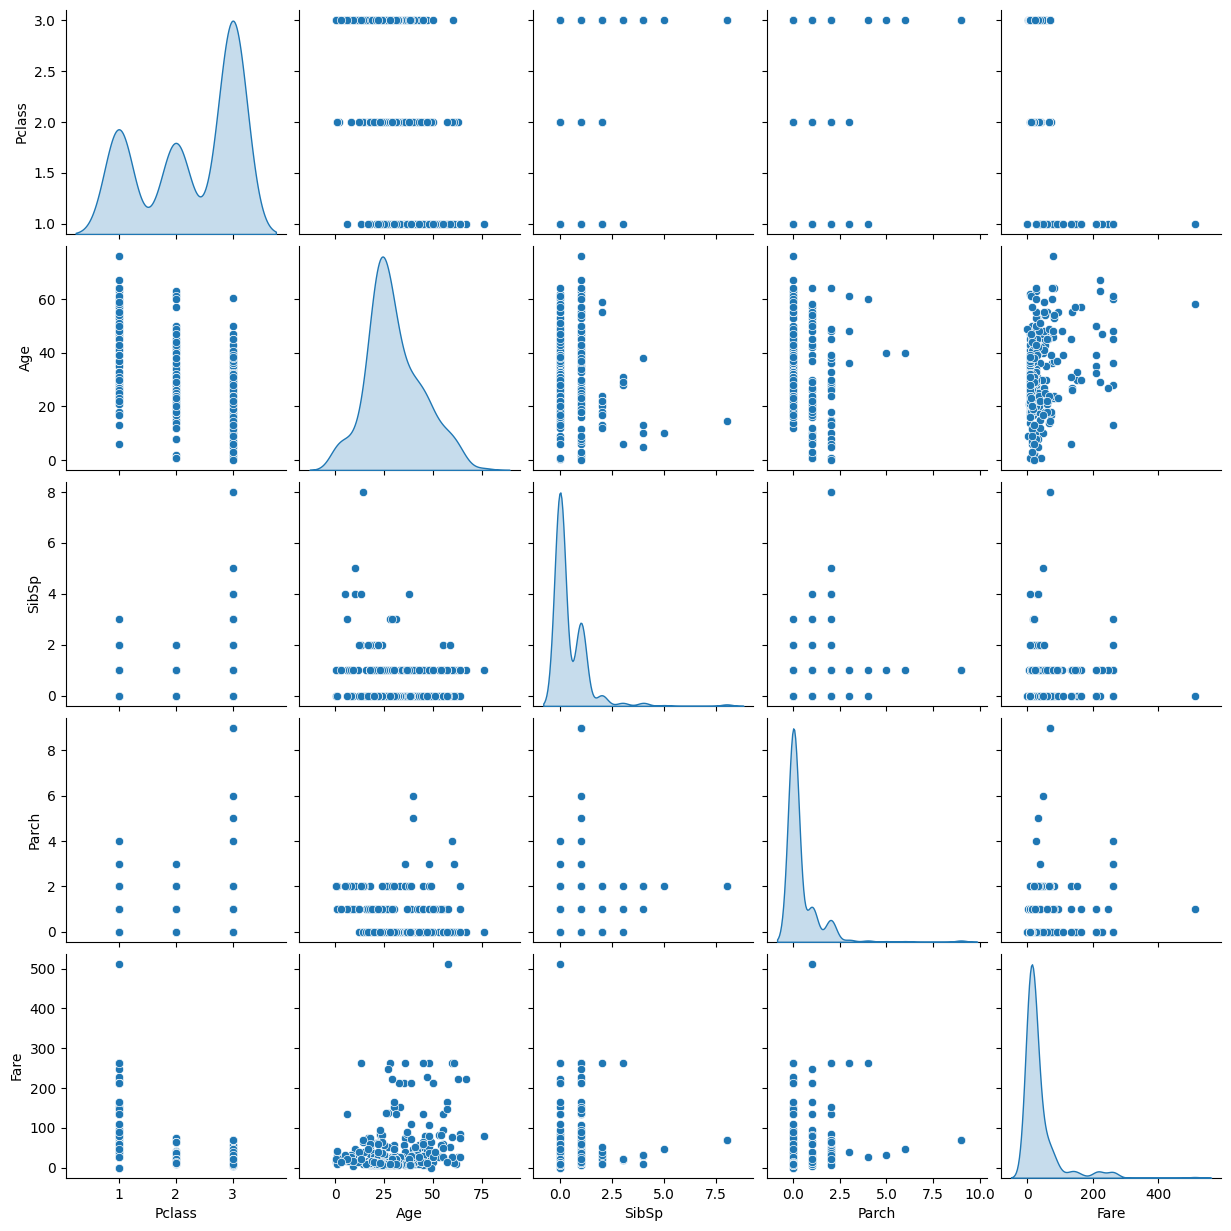

In [159]:
# Pair plot of numerical features
sns.pairplot(titanic, diag_kind='kde')
plt.show()


##These visualizations will help you understand the distributions and relationships between features such as Age, Fare, Pclass, and Embarked. By the help of this we can analyze any patterns or correlations observed in the data to gain insights into passenger demographics and behaviors.

#Data Preprocessing:


In [160]:
# We are building the model using the train data for modelling.
train=pd.read_csv('//content/Titanic_train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [161]:
train.drop(['PassengerId', 'Name','Ticket','Cabin'], axis=1, inplace=True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [162]:
train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [163]:
print('The percentage of missing values in Age', train['Age'].isnull().sum()/len(train)*100)
print('The The percentage of missing values in Embarked', train['Embarked'].isnull().sum()/len(train)*100)

The percentage of missing values in Age 19.865319865319865
The The percentage of missing values in Embarked 0.22446689113355783


In [164]:
#We are viewing the number of missing data & the percentage of missing data in each column
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'Number of values missing':train.isnull().sum(),
                                 'Percent_Missing': percent_missing})
missing_value_df

,Number of values missing,Percent_Missing
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000
Embarked,2,0.224467


In [165]:
#Display the rows that have atleast 1 missing value across any column
train[train.isnull().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [166]:
#Percentage of rows that have atleast 1 missing value across any column
len(train[train.isnull().any(axis=1)])/1340

0.1335820895522388

In [167]:
# Removing rows that have atleast 1 value missing
train = train.dropna()
train.shape
#After dropping rows with missing data, we now have 712 complete rows & 8 columns

(712, 8)

In [168]:
train.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


In [169]:
train.reset_index(drop=False, inplace=True)

In [170]:
train.head(15)

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,2,1,3,female,26.0,0,0,7.9250,S
3,3,1,1,female,35.0,1,0,53.1000,S
4,4,0,3,male,35.0,0,0,8.0500,S
5,6,0,1,male,54.0,0,0,51.8625,S
6,7,0,3,male,2.0,3,1,21.0750,S
7,8,1,3,female,27.0,0,2,11.1333,S
8,9,1,2,female,14.0,1,0,30.0708,C
9,10,1,3,female,4.0,1,1,16.7000,S


In [171]:
# Convert 'Sex' column to binary
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
print(train['Sex'].head())

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64


In [172]:
# Convert 'Embarked' column to numerical values
train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
print(train['Embarked'].head())

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64


Survived=  (Passenger will survive or not)
- 0 if Survivors
- 1 if not Victims

Pclass	 (Passenger travelling in which class[1,2 or 3])

Gender -(0- Male,1- Female)

AGE = (Age of the Passanger in years)


SibSp = (the passanger travelling with sibling or spouse)

Parch= (The Passenger travelling with Parents or Child)

Fare= (The amount of money paid by customer)

Embarked=(Place where the started)


#Model Building:


In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [174]:
train

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,1,38.0,1,0,71.2833,0
2,2,1,3,1,26.0,0,0,7.9250,2
3,3,1,1,1,35.0,1,0,53.1000,2
4,4,0,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
707,885,0,3,1,39.0,0,5,29.1250,1
708,886,0,2,0,27.0,0,0,13.0000,2
709,887,1,1,1,19.0,0,0,30.0000,2
710,889,1,1,0,26.0,0,0,30.0000,0


In [175]:
# Dividing our data into input and output variables
X = train.iloc[:,2:]    #Object for Independent Variables
Y = train.iloc[:,1]     #Object for the Dependent Variable
print(X)
print(Y)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  22.0      1      0   7.2500         2
1         1    1  38.0      1      0  71.2833         0
2         3    1  26.0      0      0   7.9250         2
3         1    1  35.0      1      0  53.1000         2
4         3    0  35.0      0      0   8.0500         2
..      ...  ...   ...    ...    ...      ...       ...
707       3    1  39.0      0      5  29.1250         1
708       2    0  27.0      0      0  13.0000         2
709       1    1  19.0      0      0  30.0000         2
710       1    0  26.0      0      0  30.0000         0
711       3    0  32.0      0      0   7.7500         1

[712 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
707    0
708    0
709    1
710    1
711    0
Name: Survived, Length: 712, dtype: int64


In [176]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

##Coefficients

In [177]:
classifier.coef_

array([[-1.173,  2.486, -0.042, -0.341, -0.046,  0.002, -0.174]])

In [178]:
# coeffiecients in dataframe format which makes easier to read
Beta_Coefficients=pd.Series(classifier.coef_[0])
Beta_Coefficients

,0
0,-1.172745
1,2.486243
2,-0.042410
3,-0.341399
4,-0.045596
5,0.001659
6,-0.173658


In [179]:
coef_df= pd.DataFrame({'Variables': ['Pclass','Sex','Age','SibSp','Parch', 'Fare', 'Embarked'], 'Beta Coefficients': Beta_Coefficients})
coef_df

,Variables,Beta Coefficients
0,Pclass,-1.172745
1,Sex,2.486243
2,Age,-0.042410
3,SibSp,-0.341399
4,Parch,-0.045596
5,Fare,0.001659
6,Embarked,-0.173658


#Interpretation

###Pclass (-1.172745): The negative coefficient suggests that passengers in higher classes (i.e., 1st class) had a higher likelihood of survival compared to those in lower classes. This is likely due to better access to lifeboats and more favorable locations on the ship.


###Sex (2.486243): The positive coefficient indicates that being female significantly increased the chances of survival. This aligns with the historical context of maritime disasters, where women and children were often given priority during evacuations.


###Age (-0.042410): The negative coefficient implies that older passengers had a slightly lower probability of survival. While the effect is relatively small, age could influence the ability to navigate and respond quickly in an emergency.


###SibSp (-0.341399): The negative coefficient suggests that having siblings or a spouse on board slightly decreased the chances of survival. This might be due to the challenges of trying to stay together or find multiple spots on lifeboats.


###Parch (-0.045596): Similarly, the negative coefficient for traveling with parents or children indicates a slight decrease in survival probability. This could also be attributed to the difficulties in coordinating with family members during the evacuation.


###Fare (0.001659): The positive coefficient for fare suggests a very small increase in survival chances with higher fare amounts. This might be because higher fares are often associated with higher classes, which had better access to lifeboats.


###Embarked (-0.173658): The negative coefficient for the embarked variable shows a slight decrease in survival chances based on the port of embarkation. While the impact is small, it might be related to where passengers were located on the ship or other regional factors.


##In summary, the most significant factors affecting survival chances appear to be Pclass and Sex, with higher class and being female significantly increasing the likelihood of survival. Age, SibSp, Parch, Fare, and Embarked also play roles, but their effects are relatively smaller.

#Probabilities

In [180]:
import numpy as np
np.set_printoptions(suppress=True)
pred_prob=classifier.predict_proba(X)
pred_prob
# Survived vs Victims

array([[0.904, 0.096],
       [0.086, 0.914],
       [0.398, 0.602],
       ...,
       [0.043, 0.957],
       [0.341, 0.659],
       [0.896, 0.104]])

In [181]:
pred_prob=pd.DataFrame(pred_prob)
#pred_prob['y_pred'] = classifier.predict(X)[0:20]
pred_prob.rename({0:'0:Survivors', 1: '1:Victims'}, inplace=True, axis=1)
#Calculated manually
pred_prob['Predictions_Manual']=pred_prob.iloc[:,1].apply(lambda x: 0 if x<0.5 else 1)#(In Output of Victims if the probabilty is greater than 0.5 it is labelled as 1 else 0)
pred_prob['Predictions From Model'] = classifier.predict(X)#Calculated by system/Automatically
pred_prob['Predicted_Decision_On_Claimant']=pred_prob.iloc[:,2].apply(lambda x: 'Survivors' if x==0 else 'Victims')
pred_prob

,0:Survivors,1:Victims,Predictions_Manual,Predictions From Model,Predicted_Decision_On_Claimant
0,0.904171,0.095829,0,0,Survivors
1,0.086095,0.913905,1,1,Victims
2,0.397793,0.602207,1,1,Victims
3,0.107934,0.892066,1,1,Victims
4,0.920784,0.079216,0,0,Survivors
...,...,...,...,...,...
707,0.538873,0.461127,0,0,Survivors
708,0.717646,0.282354,0,0,Survivors
709,0.043370,0.956630,1,1,Victims
710,0.341221,0.658779,1,1,Victims


In [182]:
#Predictions for X dataset
y_pred_df =pd.DataFrame({'Actual': Y,
                         'Prediction': classifier.predict(X)})
y_pred_df['Actual_Decision'] = y_pred_df['Actual'].apply(lambda x: 'Survivors' if x==0 else 'Victims')
y_pred_df['Predicted Decision'] = y_pred_df['Prediction'].apply(lambda x: 'Survivors' if x==0 else 'Victims')
outcome=[]
for i in range(len(y_pred_df)):
  if (y_pred_df['Actual'][i]==0) & (y_pred_df.loc[i,'Prediction']==0):
    outcome.append('True Negative')
  elif (y_pred_df['Actual'][i]==1) & (y_pred_df.loc[i,'Prediction']==1):
    outcome.append('True Positive')
  elif (y_pred_df['Actual'][i]==1) & (y_pred_df.loc[i,'Prediction']==0):
    outcome.append('False Negative')
  elif (y_pred_df['Actual'][i]==0) & (y_pred_df.loc[i,'Prediction']==0):
    outcome.append('False Positive')
  else:
    outcome.append('Invalid')
y_pred_df['Outcome']=outcome
y_pred_df.head(15)


,Actual,Prediction,Actual_Decision,Predicted Decision,Outcome
0,0,0,Survivors,Survivors,True Negative
1,1,1,Victims,Victims,True Positive
2,1,1,Victims,Victims,True Positive
3,1,1,Victims,Victims,True Positive
4,0,0,Survivors,Survivors,True Negative
5,0,0,Survivors,Survivors,True Negative
6,0,0,Survivors,Survivors,True Negative
7,1,1,Victims,Victims,True Positive
8,1,1,Victims,Victims,True Positive
9,1,1,Victims,Victims,True Positive


In [183]:
TP=len(y_pred_df[(y_pred_df['Actual']==1) & (y_pred_df['Prediction']==1)])
TN=len(y_pred_df[(y_pred_df['Actual']==0) & (y_pred_df['Prediction']==0)])
FP=len(y_pred_df[(y_pred_df['Actual']==0) & (y_pred_df['Prediction']==1)])
FN=len(y_pred_df[(y_pred_df['Actual']==1) & (y_pred_df['Prediction']==0)])


In [184]:
print('True Positives',TP)
print('True Negatives',TN)
print('False Positives',FP)
print('False Negatives',FN)

True Positives 205
True Negatives 367
False Positives 57
False Negatives 83


True Positives (TP): 205 cases where the model correctly predicted passengers as victims who were indeed victims.

True Negatives (TN): 367 cases where the model correctly predicted passengers as survivors who were indeed survivors.

False Positives (FP): 57 cases where the model incorrectly predicted passengers as survivors who were actually victims.

False Negatives (FN): 83 cases where the model incorrectly predicted passengers as victims who were actually survivors.

####These results help evaluate the model's accuracy in predicting survival outcomes. The True Positives and True Negatives indicate correct predictions, while the False Positives and False Negatives show where the model made errors.

In [185]:
#With the code below we are finding out the cases where the model predctions match the actual values in the data,
# And cross-checking the accuracy of the model.

print('Correctly predicted obs',(len(y_pred_df[y_pred_df['Actual']==y_pred_df['Prediction']])))
print('The Total number of obs',len(y_pred_df))

print('Accuracy of the model',(len(y_pred_df[y_pred_df['Actual']==y_pred_df['Prediction']])/len(y_pred_df))*100,'%')
#


Correctly predicted obs 572
The Total number of obs 712
Accuracy of the model 80.33707865168539 %


In [186]:
#Finding the accuracy of the model object automatically
classifier.score(X,Y)

0.8033707865168539

In [187]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X) # Assign predictions to y_pred
cm=confusion_matrix(Y, y_pred)
print(cm)

[[367  57]
 [ 83 205]]


In [188]:
#Checking for Sensitivity/recall
Sensitivity=TP/(TP+FN)
((205)/(205+83))*100
print('Sensitivity/Recall',round(Sensitivity,2))
#The Sensitivity/Recall of the model is approximately 71.18%. This means that the model correctly identifies around 71.18% of the actual victims.

Sensitivity/Recall 0.71


In [202]:
#Checking for Precision
Precision=(TP/(TP+FP))
((205)/(205+57))*100
print('Precision',round(Precision,2))

#The Precision of the model is approximately 78.24%.
#This means that around 78.24% of the passengers predicted to be victims were actually victims.
#High precision indicates that the model is good at correctly identifying actual victims among its positive predictions.

Precision 0.68


#Interview Questions:

##Precision and recall are two important metrics used to evaluate the performance of classification models in machine learning. Let's break them down:

###Precision measures the accuracy of the positive predictions made by the model. It is defined as the ratio of true positive (TP) predictions to the total number of positive predictions made by the model (true positives + false positives). In other words, it tells us how many of the predicted positive instances are actually positive.(P=TP/TP+FP)

###Recall, also known as sensitivity or true positive rate, measures the model's ability to correctly identify all positive instances in the dataset. It is defined as the ratio of true positive predictions to the total number of actual positive instances (true positives + false negatives). In other words, it tells us how many of the actual positive instances were correctly identified by the model.(TP/TP+FN)


##Differences
###Precision focuses on the accuracy of the positive predictions made by the model. High precision means that when the model predicts a positive instance, it is very likely to be correct.

###Recall focuses on the model's ability to identify all positive instances in the dataset. High recall means that the model can correctly identify most of the positive instances, but it may also include some false positives.


In [189]:
Sensitivity= len(y_pred_df[(y_pred_df['Actual']==1) & (y_pred_df['Prediction']==1)]) / len(y_pred_df[y_pred_df['Actual']==1])
Sensitivity

0.7118055555555556

In [190]:
len(y_pred_df[y_pred_df['Actual']==1])

288

In [191]:
#Checking for Specificity
Specificity=(TN/(TN+FP))
((367)/(367+57))*100
print('Specificity',round(Specificity,2))
#The Specificity of the model is approximately 86.51%.
#This means that the model correctly identifies around 86.51% of the actual survivors.
#High specificity indicates that the model is good at identifying passengers who survived.

Specificity 0.87


In [192]:
Specificity=len(y_pred_df[(y_pred_df['Actual']==0) & (y_pred_df['Prediction']==0)]) / len(y_pred_df[y_pred_df['Actual']==0])
Specificity

0.8655660377358491

In [193]:
#True Negatives
len(y_pred_df[(y_pred_df['Actual']==0) & (y_pred_df['Prediction']==0)])

367

In [194]:
##False Positives
len(y_pred_df[(y_pred_df['Actual']==0) & (y_pred_df['Prediction']==1)])

57

In [195]:
#Actual Zeros
len(y_pred_df[y_pred_df['Actual']==0])

424

# ROC (Receiver Operating Curve)


In [197]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
707,0
708,0
709,1
710,1


In [198]:
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True, precision = 3)
pred_prob=classifier.predict_proba(X)
pred_prob
ROC_Matrix = pd.DataFrame(pred_prob, columns=['Prob(Survivors)', 'Prob(Victims)'])
Y.reset_index(drop=True, inplace=True)
ROC_Matrix['Actual'] = Y
ROC_Matrix['<>0.1'] = ROC_Matrix['Prob(Victims)'].apply(lambda x: 0 if x <= 0.1 else 1)
ROC_Matrix['<>0.2'] = ROC_Matrix['Prob(Victims)'].apply(lambda x: 0 if x <= 0.2 else 1)
ROC_Matrix['<>0.3'] = ROC_Matrix['Prob(Victims)'].apply(lambda x: 0 if x <= 0.3 else 1)
ROC_Matrix['<>0.4'] = ROC_Matrix['Prob(Victims)'].apply(lambda x: 0 if x <= 0.4 else 1)
ROC_Matrix['<>0.5'] = ROC_Matrix['Prob(Victims)'].apply(lambda x: 0 if x <= 0.5 else 1)
ROC_Matrix['<>0.6'] = ROC_Matrix['Prob(Victims)'].apply(lambda x: 0 if x <= 0.6 else 1)
ROC_Matrix['<>0.7'] = ROC_Matrix['Prob(Victims)'].apply(lambda x: 0 if x <= 0.7 else 1)
ROC_Matrix['<>0.8'] = ROC_Matrix['Prob(Victims)'].apply(lambda x: 0 if x <= 0.8 else 1)
ROC_Matrix['<>0.9'] = ROC_Matrix['Prob(Victims)'].apply(lambda x: 0 if x <= 0.9 else 1)
ROC_Matrix['<>0.99'] = ROC_Matrix['Prob(Victims)'].apply(lambda x: 0 if x <= 1 else 1)
ROC_Matrix


,Prob(Survivors),Prob(Victims),Actual,<>0.1,<>0.2,<>0.3,<>0.4,<>0.5,<>0.6,<>0.7,<>0.8,<>0.9,<>0.99
0,0.904171,0.095829,0,0,0,0,0,0,0,0,0,0,0
1,0.086095,0.913905,1,1,1,1,1,1,1,1,1,1,0
2,0.397793,0.602207,1,1,1,1,1,1,1,0,0,0,0
3,0.107934,0.892066,1,1,1,1,1,1,1,1,1,0,0
4,0.920784,0.079216,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.538873,0.461127,0,1,1,1,1,0,0,0,0,0,0
708,0.717646,0.282354,0,1,1,0,0,0,0,0,0,0,0
709,0.043370,0.956630,1,1,1,1,1,1,1,1,1,1,0
710,0.341221,0.658779,1,1,1,1,1,1,1,0,0,0,0


In [199]:
Result=[]
j= 3
c = 0.1
while j<=12:
  for i in range(len(ROC_Matrix)):
    if (ROC_Matrix.loc[i,'Actual']==1) & (ROC_Matrix.iloc[i,j]==1):
      Result.append('True Positive')
    elif (ROC_Matrix.loc[i,'Actual']==0) & (ROC_Matrix.iloc[i,j]==0):
      Result.append('True Negative')
    elif (ROC_Matrix.loc[i,'Actual']==1) & (ROC_Matrix.iloc[i,j]==0):
      Result.append('False Negative')
    elif (ROC_Matrix.loc[i,'Actual']==0) & (ROC_Matrix.iloc[i,j]==1):
      Result.append('False Positive')
    else:
      Result.append('Invalid')

  TP= Result.count('True Positive')
  TN= Result.count('True Negative')
  FP= Result.count('False Positive')
  FN= Result.count('False Negative')
  print('At cutoff',round(c,1),'False Positive Rate is', 1 - (TN/(TN+FP)), '& True Positive Rate is', (TP/(TP+FN)))
  j+=1
  c+=0.1


#ROC_Matrix[:30]

At cutoff 0.1 False Positive Rate is 0.7476415094339622 & True Positive Rate is 0.9548611111111112
At cutoff 0.2 False Positive Rate is 0.5813679245283019 & True Positive Rate is 0.9079861111111112
At cutoff 0.3 False Positive Rate is 0.48191823899371067 & True Positive Rate is 0.8831018518518519
At cutoff 0.4 False Positive Rate is 0.410377358490566 & True Positive Rate is 0.8559027777777778
At cutoff 0.5 False Positive Rate is 0.35518867924528297 & True Positive Rate is 0.8270833333333333
At cutoff 0.6 False Positive Rate is 0.3089622641509434 & True Positive Rate is 0.7980324074074074
At cutoff 0.7 False Positive Rate is 0.27055256064690025 & True Positive Rate is 0.7633928571428571
At cutoff 0.8 False Positive Rate is 0.2382075471698113 & True Positive Rate is 0.7170138888888888
At cutoff 0.9 False Positive Rate is 0.21226415094339623 & True Positive Rate is 0.6597222222222222
At cutoff 1.0 False Positive Rate is 0.1910377358490566 & True Positive Rate is 0.59375


0.7886857966457024


Text(0, 0.5, 'True Positive Rate or Sensitivity')

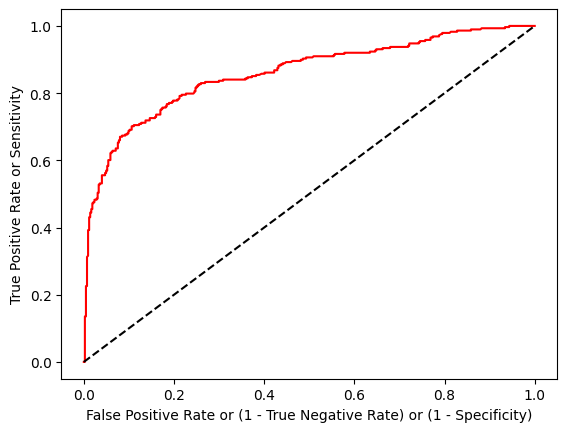

In [200]:
#AUC = Area Under Curve
#The greater the area under the curve, the better the model.
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or (1 - True Negative Rate) or (1 - Specificity)')
plt.ylabel('True Positive Rate or Sensitivity')

#Deployment

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 24 13:01:17 2020
"""

import pandas as pd
import streamlit as st
from sklearn.linear_model import LogisticRegression

st.title('Model Deployment: Logistic Regression')

st.sidebar.header('User Input Parameters')

def user_input_features():
    Pclass = st.sidebar.selectbox('Pclass (Travel Class)', (1, 2, 3))
    Sex = st.sidebar.selectbox('Gender', ('Female', 'Male'))
    Sex = 1 if Sex == 'Female' else 0
    Age = st.sidebar.number_input("Insert the Age")
    SibSp = st.sidebar.selectbox('SibSp (With Sibling or Spouse)', (0, 1, 2, 3, 4, 5, 6, 7, 8))
    Parch = st.sidebar.selectbox('Parch (With Parents or Child)', (0, 1, 2, 3, 4, 5, 6))
    Fare = st.sidebar.number_input("Insert the Fare")
    Embarked = st.sidebar.selectbox('Embarked (Place of Embarkation)', ('C', 'Q', 'S'))
    Embarked = {'C': 0, 'Q': 1, 'S': 2}[Embarked]

    data = {
        'Pclass': Pclass,
        'Sex': Sex,
        'Age': Age,
        'SibSp': SibSp,
        'Parch': Parch,
        'Fare': Fare,
        'Embarked': Embarked
    }
    features = pd.DataFrame(data, index=[0])
    return features

df = user_input_features()
st.subheader('User Input parameters')
st.write(df)

train = pd.read_csv("Titanic_train.csv")
train.dropna(inplace=True)

# Encode categorical features
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'female' else 0)
train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = train['Survived']
clf = LogisticRegression()
clf.fit(X, Y)

prediction = clf.predict(df)
prediction_proba = clf.predict_proba(df)

st.subheader('Predicted Result')
st.write('Survived' if prediction[0] == 1 else 'Victim')

st.subheader('Prediction Probability')
st.write(prediction_proba)

Output:

# http://localhost:8501/

#Interview Question


##Cross-validation is a technique used to assess the performance and generalizability of a machine learning model. It involves dividing the dataset into multiple subsets (folds) and training the model on some of these folds while testing it on the remaining ones. This process is repeated several times, and the results are averaged to get a more accurate estimate of the model's performance.

###Why Cross-Validation is Important in Binary Classification

### 1.Reduces Overfitting: By training and testing the model on different subsets of the data, cross-validation helps ensure that the model generalizes well to new, unseen data. It reduces the risk of overfitting, where the model performs well on the training data but poorly on the test data.

###2.Provides Robust Performance Estimate: Cross-validation provides a more reliable estimate of the model's performance compared to a single train-test split. By averaging the results across multiple folds, it accounts for variability in the data and gives a more stable measure of the model's accuracy, precision, recall, and other metrics.

###3.Utilizes Data Efficiently: In situations where the dataset is small, cross-validation makes efficient use of the data by allowing the model to be trained and tested on different subsets. This ensures that the evaluation is not biased by the specific train-test split used.